# 1.1 Поліноми Лагерра 
Поліномами Лаґерра називаються розв'язки диференційного рівняння $$xy^{\prime\prime}+(1-x)*y^\prime+ny=0$$

Полiноми Лагера визначаються формулою: $$L_n(x)= \frac{e^x}{n!}\frac{d^n}{dx^n}(e^{-x}*x^n)$$

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad
import ipywidgets as widgets
from IPython.display import display, clear_output

# 1.2 Функцiї Лагерра
Функцiї Лаґерра задають формулою: $$l_n(t) := \sqrt{σ}L_n(σt)e^{\frac{-β}{2}t}$$
де
- Ln – полiноми Лаґерра,
- 0 ≤ β ≤ σ – параметри, дiйснi числа

Для обчислень функцiй Лаґерра використовують рекурентну формулу:

- $l_n(t)=\frac{2n-1-σt}{n}l_{n-1}(t)-\frac{n-1}{n}l_{n-2}(t),$ n≥2
- $l_0(t)= \sqrt{σ} e^{\frac{-β}{2}t}$
- $l_1(t)=\sqrt{σ}(1-σt)e^{\frac{-β}{2}t}$


In [95]:
# task1
def laguerre(t,n,beta=2,sigma=4):
    l0 = np.sqrt(sigma) * (np.exp(-beta * t / 2))
    l1 = np.sqrt(sigma) * (1 - sigma * t) * (np.exp(-beta * t / 2))
    if n==0:
        return l0
    elif n==1:
        return l1
    else:
        lnext = (2 * 2 - 1 - t * sigma) / 2 * l1 - (2 - 1) / 2 * l0
        for j in range(3, n+1):
            l0 = l1
            l1 = lnext
            lnext = (2 * j - 1 - t * sigma) / j * l1 - (j - 1) / j * l0 
        return lnext
        

In [96]:
result = laguerre(1,3,2,4)

print(result)

1.7167707254667308


In [97]:
n_slider = widgets.IntSlider(min=0, max=10, continuous_update=False, description='n')

t_slider = widgets.FloatSlider(min=0, max=1, step=0.01, continuous_update=False, description='t')

output = widgets.Output()

def update_result(change):
    with output:
        result = laguerre(t_slider.value, n_slider.value)
        print(f"Результат для n={n_slider.value}, t={t_slider.value}: {result}")


n_slider.observe(update_result, 'value')
t_slider.observe(update_result, 'value')

display(widgets.HBox([n_slider, t_slider]))
display(output)

Output()

In [98]:
# task 2
def tabulate_laguerre(n, beta, sigma, T, num_points=100):
    t_values = np.linspace(0, T, num_points)
    laguerre_values = [laguerre(t, n, beta, sigma) for t in t_values]
    return t_values, laguerre_values

In [99]:
n = 2
beta = 2
sigma = 4
T = 10
num_points = 100

t_values, laguerre_values = tabulate_laguerre(n, beta, sigma, T, num_points)

df = pd.DataFrame(laguerre_values,t_values)
df

,0
0.00000,2.000000
0.10101,0.494525
0.20202,-0.473357
0.30303,-1.018680
0.40404,-1.236873
...,...
9.59596,0.089885
9.69697,0.083067
9.79798,0.076747
9.89899,0.070891


In [100]:
n_slider = widgets.IntSlider(min=0, max=10, continuous_update=False, description='n')
beta_slider = widgets.FloatSlider(min=0, max=10, step=0.1, value=2, continuous_update=False, description='beta')
sigma_slider = widgets.FloatSlider(min=0, max=10, step=0.1, value=4, continuous_update=False, description='sigma')
T_slider = widgets.FloatSlider(min=1, max=10, step=0.1, value=5, continuous_update=False, description='T')

output_df = widgets.Output()

def update_df(change):
    with output_df:
        clear_output(wait=True)
        t_values, laguerre_values = tabulate_laguerre(n_slider.value, beta_slider.value, sigma_slider.value, T_slider.value)
        df = pd.DataFrame(laguerre_values, index=t_values, columns=['Laguerre'])
        display(df)

n_slider.observe(update_df, 'value')
beta_slider.observe(update_df, 'value')
sigma_slider.observe(update_df, 'value')
T_slider.observe(update_df, 'value')

display(widgets.VBox([n_slider, beta_slider, sigma_slider, T_slider]))
display(output_df)

Output()

In [101]:
#task 3
def experiment(n=20, beta=2, sigma=4, eps=0.001, t_max = 100, t_points=1000):
    T = np.linspace(0, t_max, t_points)
    N = range(0, n + 1)
    suitable_t = None
    for t in T:
        is_t_suitable = all(abs(laguerre(t=t, n=n, beta=beta, sigma=sigma)) < eps for n in N)
        if is_t_suitable and suitable_t is None:
            suitable_t = t
            break

    return suitable_t, N

In [102]:
t, N = experiment()

df = pd.DataFrame(laguerre(t=t, n=n, beta=beta, sigma=sigma) for n in N)
df

,0
0,9.066138e-35
1,-2.858701e-32
2,4.478343e-30
3,-4.647081e-28
4,3.593209e-26
5,-2.208132e-24
6,1.123332e-22
7,-4.865604e-21
8,1.831625e-19
9,-6.087176e-18


In [103]:
n_slider_exp = widgets.IntSlider(min=1, max=50, continuous_update=False, description='n')
beta_slider_exp = widgets.FloatSlider(min=0, max=10, step=0.1, value=2, continuous_update=False, description='beta')
sigma_slider_exp = widgets.FloatSlider(min=0, max=10, step=0.1, value=4, continuous_update=False, description='sigma')
eps_value = 0.001
eps_slider_exp = widgets.FloatSlider(min=0.001, max=0.001, step=0.001, value=eps_value, continuous_update=False, description='eps', disabled=True)
t_max_slider_exp = widgets.IntSlider(min=10, max=200, step=10, value=100, continuous_update=False, description='t_max')
t_points_slider_exp = widgets.IntSlider(min=100, max=2000, step=100, value=1000, continuous_update=False, description='t_points')

output_exp = widgets.Output()

def update_experiment(change):
    with output_exp:
        clear_output(wait=True)
        t, N = experiment(n=n_slider_exp.value, beta=beta_slider_exp.value, sigma=sigma_slider_exp.value,
                          eps=eps_value, t_max=t_max_slider_exp.value, t_points=t_points_slider_exp.value)
        df = pd.DataFrame(laguerre(t=t, n=n, beta=beta_slider_exp.value, sigma=sigma_slider_exp.value) for n in N)
        display(df)

n_slider_exp.observe(update_experiment, 'value')
beta_slider_exp.observe(update_experiment, 'value')
sigma_slider_exp.observe(update_experiment, 'value')
t_max_slider_exp.observe(update_experiment, 'value')
t_points_slider_exp.observe(update_experiment, 'value')

display(widgets.VBox([n_slider_exp, beta_slider_exp, sigma_slider_exp, eps_slider_exp, t_max_slider_exp, t_points_slider_exp]))
display(output_exp)

Output()

# 1.3 Перетворення Лаґерра (ПЛ)
Пiд ПЛ будемо розумiти вiдображення L :$ L^2_a(R_+)$ → *$l^2$*, яке довiльнiй функцiї f ∈ $L^2_a$ ставить у вiдповiднiсть послiдовнiсть f := (f0, f1, ..., fk, ...)⊤∈ $l^2$
за формулою $$f_k = \int_{R_+}^{} f(t)l_k(t) e^{-αt}\, dt$$  
$$a=σ-β$$



In [104]:
#task 4
def transform_laguerre(f,n,beta=2,sigma=4):
    def func(t):
        alpha = sigma-beta 
        return f(t)*laguerre(t,n,beta,sigma) * np.exp(-alpha*t)
    t = experiment(n, beta,sigma)[0]

    return quad(func,0,t)[0]

In [105]:
def tabulate_transformation(f, N, beta=2, sigma=4):
    result = []
    for n in range(N+1):
        result.append(transform_laguerre(f, n, beta, sigma))
    return result

## Нам дана функція:$$f(t)= sin(t-\frac{\pi}{2})+1, t∈[0,2\pi]$$ 
## $$f(t)=0$$ в інших випадках

In [106]:
#task 5
def f(t):
    if t >= 0 and t <= 2*np.pi:
        return np.sin(t-np.pi/2) + 1
    else:
        return 0

results = tabulate_transformation(f, 20,2,4)

df = pd.DataFrame(results)
df

,0
0,0.066667
1,-0.182222
2,0.178074
3,-0.074290
4,0.007264
5,0.007588
6,-0.003097
7,-0.000615
8,0.000800
9,-0.000026


In [107]:
n_slider = widgets.IntSlider(min=0,max=20,  continuous_update=False)

def update_experiment(change):
    with output_exp:
        clear_output(wait=True)
        results = tabulate_transformation(f, n_slider.value,2,4)
        df = pd.DataFrame(results)
        display(df)
        
n_slider.observe(update_experiment, 'value')
display(widgets.VBox([n_slider]))
display(output_exp)

Output()

# 1.4 Обернене перетворення Лагера 
Обернене перетворення Лагера ставить у вiдповiднiсть вектору значень h := (h0, h1, . . . , hk, . . .)
функцiю h(t) $$h(t)=\sum_{k=0}^\infty h_kl_k(t) $$

In [108]:
#task 6
def inverse_laguerre(h, t, beta=2, sigma=4):
    result = 0
    for i, coeff in enumerate(h):
        result += coeff * laguerre(t, i, beta, sigma)
    return result

In [109]:
h_values = [1, 2, 3] 
t_value = 0.5

result = inverse_laguerre(h_values, t_value)
print(result)

-4.852245277701067


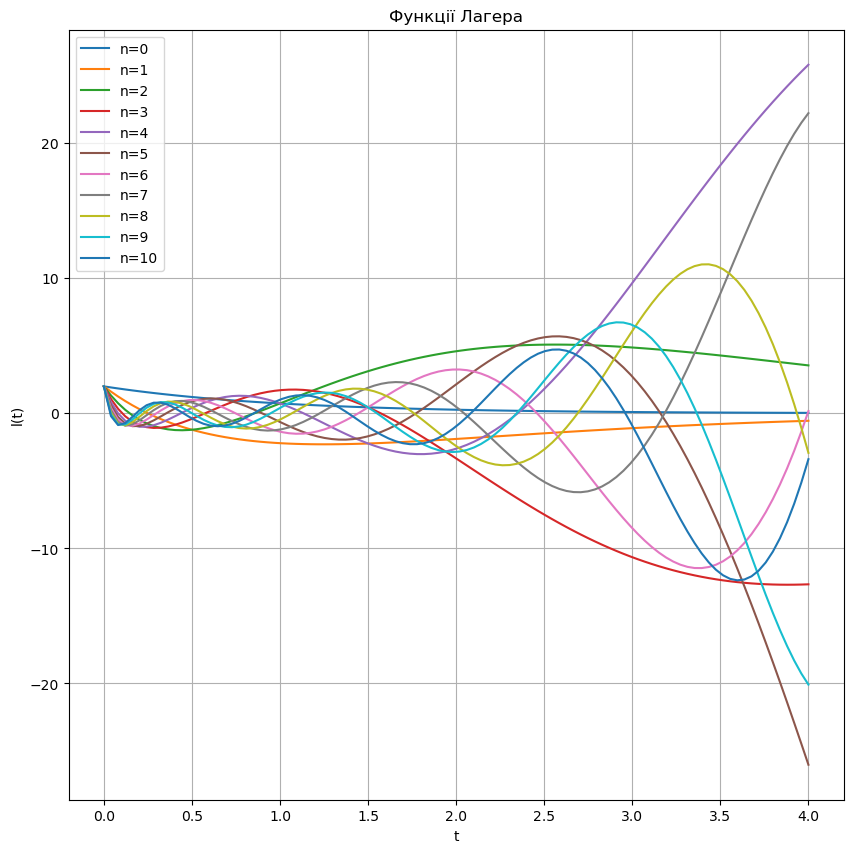

In [110]:
#task 7

def make_plots(T, N, beta=2, sigma=4):
    fig, ax = plt.subplots(figsize=(10, 10))

    for n in range(N + 1):
        t_values, laguerre_values = tabulate_laguerre(n, beta, sigma,T)
        ax.plot(t_values, laguerre_values, label=f"n={n}")

    ax.set_xlabel("t")
    ax.set_ylabel("l(t)")
    ax.set_title("Функцiї Лагера")
    plt.grid()
    ax.legend()
    plt.show()

make_plots(4, 10)

In [111]:
T_slider_plots = widgets.FloatSlider(min=1, max=10, step=0.1, value=4, continuous_update=False, description='T')
N_slider_plots = widgets.IntSlider(min=1, max=20, continuous_update=False, description='N')

output_plots = widgets.Output()

def update_plots(change):
    with output_plots:
        clear_output(wait=True)
        T_value = T_slider_plots.value
        N_value = N_slider_plots.value -1
        make_plots(T_value, N_value)

T_slider_plots.observe(update_plots, 'value')
N_slider_plots.observe(update_plots, 'value')

display(widgets.VBox([T_slider_plots, N_slider_plots]))
display(output_plots)

Output()

In [112]:
def tabulate_inverse(func,transformed_values,t1=0,t2=2*np.pi,beta=2,sigma=4):
    T = np.linspace(t1,t2,1000)
    result =[]
    correct_values = []
    for t in T:
        result.append(inverse_laguerre(transformed_values,t,beta,sigma))
        correct_values.append(func(t))
    return result,correct_values

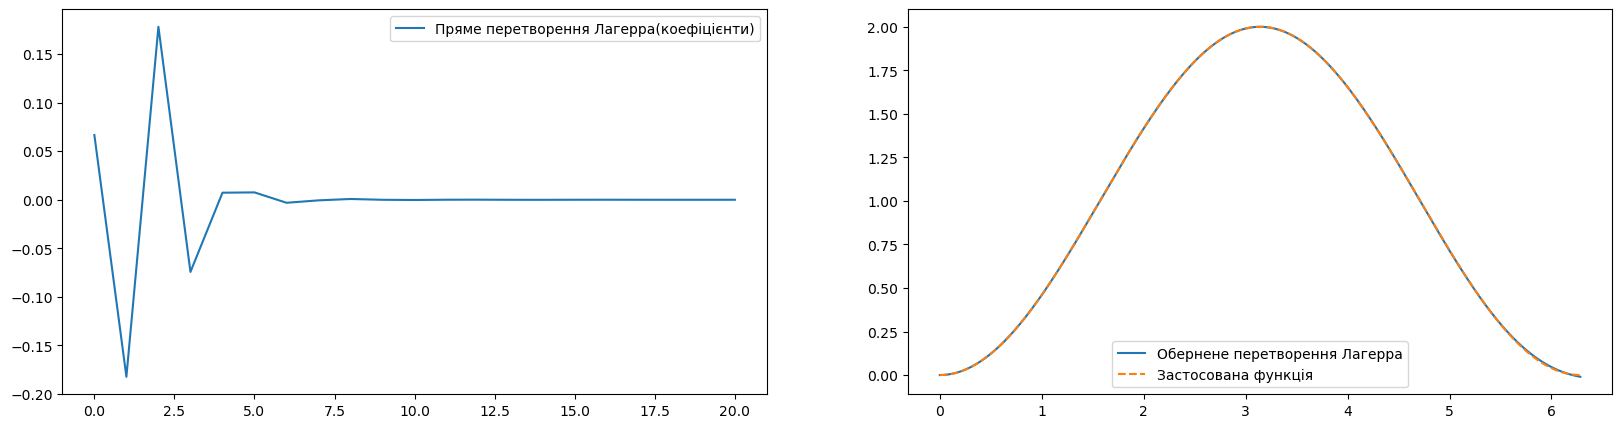

In [113]:
transformed = tabulate_transformation(f,20,2,4)
reversed_transform_values, correct = tabulate_inverse(f,transformed)

fig = plt.figure(figsize=(20,5))
ax = fig.subplots(1,2)
ax[0].plot(transformed, label="Пряме перетворення Лагерра(коефіцієнти)")
ax[0].legend()
ax[1].plot(np.linspace(0,2*np.pi,1000),reversed_transform_values, label='Обернене перетворення Лагерра')
ax[1].plot(np.linspace(0,2*np.pi,1000),correct, label='Застосована функція', linestyle="--")
ax[1].legend()

В попередній комірці ми отримали два графіки: на першому відображені
коефіцієнти прямого перетворення Лаґерра, а на другому обернене
перетворення, а також значення нашої функції. 
Як бачимо, ці графіки
співпадають, що дає нам змогу удостовіритись у правильності побудови
обернено перетворення Лаґерра.

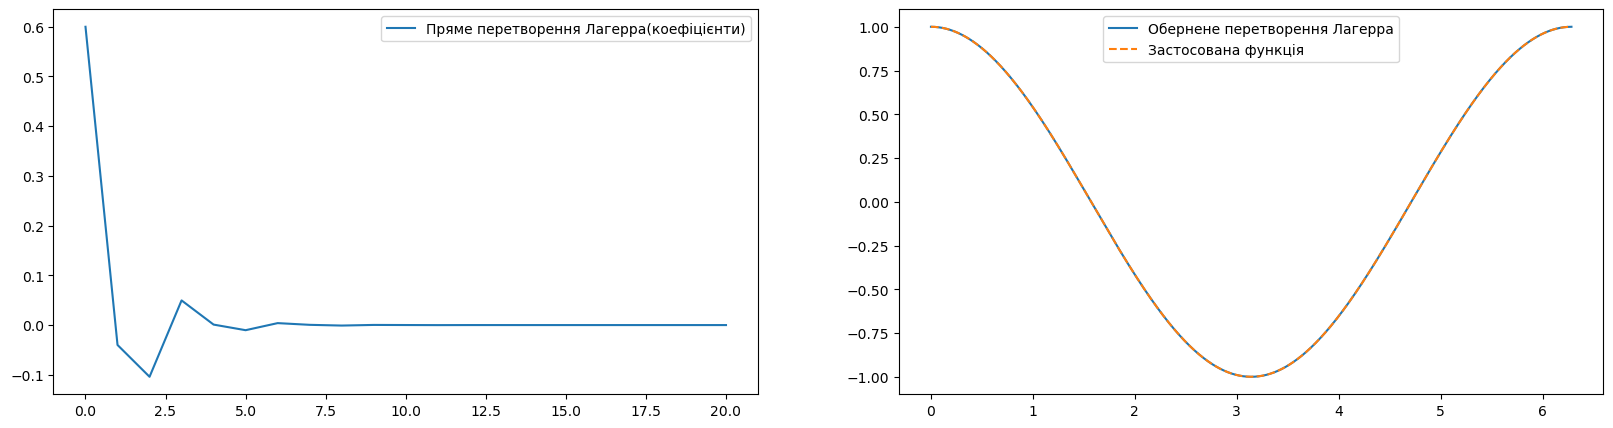

In [114]:
def example(x):
    return np.cos(x)

result = tabulate_transformation(example, 20,2,4)

reversed_transform, correct_values = tabulate_inverse(example,result)

fig = plt.figure(figsize=(20,5))
ax = fig.subplots(1,2)
ax[0].plot(result, label="Пряме перетворення Лагерра(коефіцієнти)")
ax[0].legend()
ax[1].plot(np.linspace(0,2*np.pi,1000),reversed_transform, label='Обернене перетворення Лагерра')
ax[1].plot(np.linspace(0,2*np.pi,1000),reversed_transform, label='Застосована функція', linestyle="--")
ax[1].legend()

In [115]:
def update_inverse_laguerre_plot(n):
    transformed = tabulate_transformation(f, n)
    reversed_transform_values, correct = tabulate_inverse(f, transformed)

    fig, ax = plt.subplots(1, 2, figsize=(20, 5))

    ax[0].plot(transformed, label="Пряме перетворення Лагерра(коефіцієнти)")
    ax[0].legend()

    ax[1].plot(np.linspace(0, 2*np.pi, 1000), reversed_transform_values, label='Обернене перетворення Лагерра')
    ax[1].plot(np.linspace(0, 2*np.pi, 1000), correct, label='Застосована функція', linestyle="--")
    ax[1].legend()

    plt.show()


n_slider_inverse = widgets.IntSlider(min=1, max=20, continuous_update=False, description='n')

output_inverse = widgets.Output()

def update_inverse(change):
    with output_inverse:
        clear_output(wait=True)
        n_value = n_slider_inverse.value
        update_inverse_laguerre_plot(n_value)

n_slider_inverse.observe(update_inverse, 'value')

display(widgets.VBox([n_slider_inverse]))
display(output_inverse)

Output()

За допомогою попередньої комірки ми можемо спостерігати, як із змінною значення n у нас збільшується точність графіку

У результаті лабораторної роботи ми вивчили що таке поліноми Лаґерра, написали функції для їх знаходження та функції для прямого та обернего перетворення та як застосовувати до них табуляцію.
    Навчились будувати таблиці за допомогою pandas та створювати графіки за допомогою matplotlib вивчили, що таке віджети та як з їх допомогою можна задавати різні значення для функцій, щоб отримувати різний результат.
Навчилися працювати у форматі ноутбуків, та як переводити 
їх у формат PDF за допомогою latex.